## Classificação de somente uma imagem

In [1]:
#  Utilizar imagens do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios/weights.hdf5'

In [3]:
from google.colab.patches import cv2_imshow # Visualizar imagens
from keras.models import load_model # Carregar modelo já criado
import numpy as np
import cv2 # OpenCV Visão computacional para fazer leitura de imagens

modelo_treinado = load_model(path)

In [4]:
modelo_treinado.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [5]:
img_class0 = '/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios/DPTO_MEDICO/Test/0/ryct.2020200034.fig5-day0.jpeg'
img_class1 = '/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios/DPTO_MEDICO/Test/1/IM-0176-0001.jpeg'
img_class2 = '/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios/DPTO_MEDICO/Test/2/person270_virus_555.jpeg'
img_class3 = '/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios/DPTO_MEDICO/Test/3/person1_bacteria_1.jpeg'
classes = {0: 'Covid-19', 1: 'Normal', 2: 'Pneumonia viral', 3: 'Pneumonia bacterial'}
classes

{0: 'Covid-19', 1: 'Normal', 2: 'Pneumonia viral', 3: 'Pneumonia bacterial'}

In [6]:
def fazer_predicao(img_url):
  img = cv2.imread(img_url)
  
  # A imagem está fora do padrão, deveria ser 256x256
  print(f'Tamanho da imagem: {img.shape[0]}x{img.shape[1]}-{img.shape[2]}\n\n')

  # Redimensionar a imagem
  img = cv2.resize(img, (256, 256))
  cv2_imshow(img) 

  # Normalizar valores da imagem (valores entre 0 e 1)
  img = img/255
  

  # Precisamos ter o formato de batch, vamo fazer o redimensionamento
  # -1 | adiciona o valor =1, o que indica que estamos trabalhamos com uma imagem só (-1 é indefinido)
  img = img.reshape(-1, 256, 256, 3)
  print(f'\n\n{img.shape[0]} Imagem(ns) | Tamanho da imagem: {img.shape[1]}x{img.shape[2]}-{img.shape[3]}\n\n')

  # Previsão
  predict = modelo_treinado(img)

  # O indice com maior valor é a previsão mais correta
  classe_prevista = np.argmax(predict)
  probab = predict.numpy().tolist()
  probab_100 = [n*100 for n in probab[0]]
  print(f'Probabilidades (%): {probab_100}\n\n')
  probab = probab[0][classe_prevista]

  print(f'Com probabilidade de {round(probab*100, 2)}%, a imagem abaixo pertence a classe {classe_prevista}: {classes[classe_prevista]}')


Tamanho da imagem: 1333x1118-3




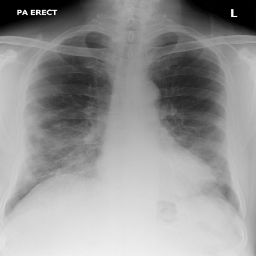



1 Imagem(ns) | Tamanho da imagem: 256x256-3


Probabilidades (%): [100.0, 1.3001145451368306e-33, 2.076782842353249e-35, 1.751036396600708e-27]


Com probabilidade de 100.0%, a imagem abaixo pertence a classe 0: Covid-19


In [7]:
fazer_predicao(img_class0)

Tamanho da imagem: 1557x1680-3




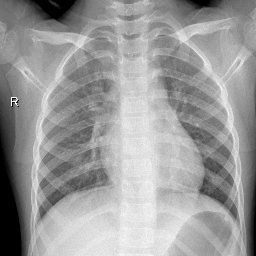



1 Imagem(ns) | Tamanho da imagem: 256x256-3


Probabilidades (%): [3.3831945547360255e-17, 100.0, 1.7704178083335728e-15, 6.2975706385992396e-21]


Com probabilidade de 100.0%, a imagem abaixo pertence a classe 1: Normal


In [8]:
fazer_predicao(img_class1)

Tamanho da imagem: 1264x1624-3




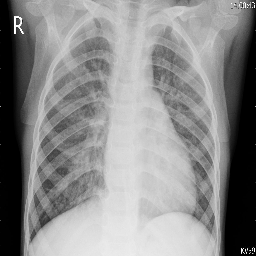



1 Imagem(ns) | Tamanho da imagem: 256x256-3


Probabilidades (%): [7.492523955595059e-13, 0.0002740411673585186, 99.99972581863403, 2.4887299252679407e-10]


Com probabilidade de 100.0%, a imagem abaixo pertence a classe 2: Pneumonia viral


In [9]:
fazer_predicao(img_class2)

Tamanho da imagem: 439x712-3




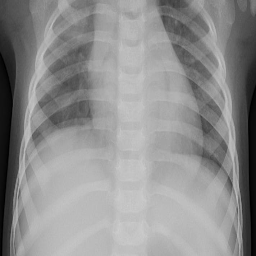



1 Imagem(ns) | Tamanho da imagem: 256x256-3


Probabilidades (%): [0.009708210563985631, 0.4383677616715431, 0.028996882610954344, 99.52292442321777]


Com probabilidade de 99.52%, a imagem abaixo pertence a classe 3: Pneumonia bacterial


In [10]:
fazer_predicao(img_class3)